In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Probability distribution

Normal Distribution
$$
    p(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{\bigg\}
$$

$$
    F(X < x|\mu, \sigma) = \int_{-\infty}^x dx \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{\bigg\}
$$

# Pseudo random sampling and Expections
- A function $f$ is called a linear operator if $f(ax+by) = af(x) + bf(y)$ for all $x$ and $y$ and constants $a$ and $b$
- Expectation
\begin{align}
        \mathbb{E}[f(X)] & = \sum_i p(x_i) f(x_i) \quad\mbox{PMF}\\
                         & = \int_\Omega dx p(x) f(x) \quad\mbox{PDF}
\end{align}
-  Expection is a linear operator:

\begin{align}
        \mathbb{E}[aX + bY] & = \sum_{x,y}(ax + by)p_{X,Y}(x,y) \\
                            & = \sum_x \sum_y (ax p_{X,Y}(x, y)) + \sum_x \sum_y(by p_{X,Y}(x,y))\\
                            & = \sum_x \left(
                              ax \sum_y (p_{X,Y}(x, y))
                            \right)
                             +
                            \sum_y
                            \left(
                              by \sum_x p_{X,Y}(x,y)
                            \right) \\
                            & = a\mathbb{E}[X] + b\mathbb{E}[Y]
\end{align}


- Examples
$$
    \mathbb{E}[X] = \int_\Omega dx p(x) x \\
    \mathbb{E}[X^2] = \int_\Omega dx p(x) x^2
$$
- Useful Formula.
$$
    \mathbb{E}[X] = \mu \\
    \mathbb{E}[ a X + b ] = a \mathbb{E}[X] + b
$$
$$
    \mathbb{V}[X] = \mathbb{E}[ (X-\mu)^2 ] = \sigma^2 = \mathbb{E}[X^2] - \mu^2 \\
    \mathbb{V}[aX+b] = \mathbb{E}[ (aX-a\mu)^2 ] = a^2\mathbb{E}[ (X-\mu)^2 ] =a^2 \mathbb{V}[X]
$$

Calculation with samples.

In [49]:
n_samples = 100000

In [50]:
rs = stats.norm.rvs(loc=0, scale=1, size=(n_samples))

In [51]:
# expection
mean = rs.sum() / n_samples
# variance = mean of squared deviation from the mean
var = np.sum((rs - mean)**2) / n_samples
# standard deviation = sqrt of var
std = np.sqrt(var)

In [52]:
print(mean, std)

0.005020448474646122 0.9998026096081127


Now a random variable which is equivalent to the affinely transformed version.

In [53]:
# X_2 = X * 2 + 1
rs2 = stats.norm.rvs(loc=5, scale=2, size=n_samples)

In [54]:
# expection
mean2 = rs2.sum() / n_samples
# variance = mean of squared deviation from the mean
var2 = np.sum((rs2 - mean2)**2) / n_samples
# standard deviation = sqrt of var
std2 = np.sqrt(var2)

In [55]:
print(mean2, std2)

5.006055936619517 1.9972059059082308


The result may also be obtained by simple affine transformation:

In [56]:
# apply the formula to get the mean and std for X_2
mean22 = 2*mean + 5
var22 = 2**2 * var2
std22 = np.sqrt(var22)
print(mean22, std22)

5.010040896949293 3.9944118118164615


- The difference is caused by the computation from samples.
- By increasing the number of samples, the difference do decrease. 
- With infinitely many samples, no difference will occur.

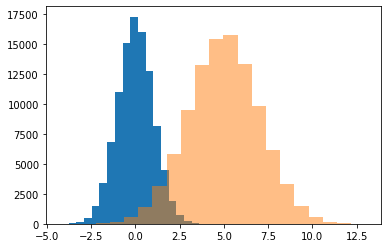

In [57]:
plt.hist(rs, bins=20);
plt.hist(rs2, alpha=.5, bins=20);

## Sum of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = X_1 + X_2 
\end{align}
where $X_i$s are independent random variables.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \mathbb{E}[X_1] + \mathbb{E}[X_2] \quad \mbox{so},\quad \mu_Y = \mu_{X_1} + \mu_{X_2}\\
    \mathbb{V}[Y] & = \mathbb{E}[(Y-\mu_Y)^2] \quad \mbox(show)\\
                  & = \mathbb{V}[X_1] + \mathbb{V}[X_2] \\
    Std(Y) &= \sqrt{Std(X_1)^2 + Std(X_2)^2 }
\end{align}

In [72]:
n_samples = 1000000

In [93]:
X1 = stats.norm.rvs(loc=-3, scale=2, size=n_samples)
X2 = stats.norm.rvs(loc= 3, scale=2, size=n_samples)

In [94]:
Y = X1 + X2

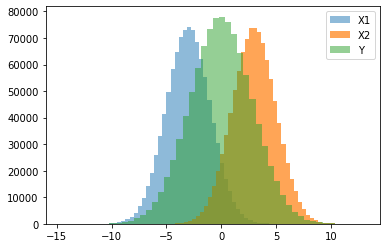

In [95]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

In [96]:
X1.mean(), X2.mean(), Y.mean()

(-2.998136388361275, 3.000786370133396, 0.002649981772120698)

In [98]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(1.9996419143503181, 2.0021590362069444, 2.828913264937155, 2.829701148865676)

## Mean of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = \frac{1}{n}\sum_i X_i
\end{align}
where $X_i$s are independent identically distributed (iid) random variables with mean $\mu$ and std $\sigma$.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \frac{1}{n}\sum_i \mathbb{E}[X_i] = \mu\\
    \mathbb{V}[Y] & = \mathbb{V}\bigg[\frac{1}{n}\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\mathbb{V}\bigg[\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\sum_i\mathbb{V}\big[X_i\big] \quad\mbox{independence, uncorrelated}\\
                  & = \frac{1}{n^2}\sum_i \sigma^2 \\
                  & = \frac{1}{n} \sigma^2 \\
    Std(Y) &= \frac{\sigma}{\sqrt{n}}   \quad \mbox{called 'standard error'}
\end{align}
- Implication:
    - measure as many $X$'s as possible, and compute its mean $Y$.
    - the expectation of $Y$ approaches to the true mean $\mu$ in the limit.
    - the standard deviation of $Y$ approaches to 0.
    - the std of $Y$ is actually the error of the mean estimator $Y$. So it is called the **standard error** (SE).

jupyter nbconvert rv_n_distribution.ipynb --to webpdf --HTMLExporter.theme=dark --allow-chromium-download --execute

https://blog.jupyter.org/the-templating-system-of-nbconvert-6-47ea781eacd2